In [8]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
from qiskit.tools.monitor import job_monitor

In [9]:
# importing Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


In [10]:
# import basic plot tools
from qiskit.visualization import plot_histogram

In [11]:
def counts_to_prob_1d(counts):
    # Convert histogram counts to probability vector of size 1 x 2^n
    states = list(counts.keys())
    state_counts = list(counts.values())
    nshots = sum(state_counts)
    # Convert binary to integer index, reversing order as consistent w qiskit convention
    states_x = [int(s[::-1],2) for s in states]
    # Create array of probability values
    probabilities = np.zeros(2**n)
    probabilities[states_x] = state_counts
    probabilities /= nshots
    return probabilities

In [12]:
def increment_gate(circuit, qpos, qcoin):
    n = len(qpos)
    for i in range(n):
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        
def decrement_gate(circuit, qpos, qcoin):
    n = len(qpos)
    circuit.x(qcoin[0])
    for i in range(n):
        if i+1 < n: circuit.x(qpos[i+1:])
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        if i+1 < n: circuit.x(qpos[i+1:])
            
def step(circuit, qpos, qcoin,cpos):
    circuit.h(qcoin)
    circuit.barrier()
    increment_gate(circuit, qpos, qcoin)
    circuit.barrier()
    decrement_gate(circuit, qpos, qcoin)
    circuit.barrier()
    if simulatorType == 'classical':
        circuit.measure(qpos,cpos)

def run(steps):
    # steps = number of quantum walks steps
    # simulatorType = 'sim'

        #simulatorType == 'classical':
        #simulator = Aer.get_backend('qasm_simulator')
    simulator = Aer.get_backend('aer_simulator')
        
    qpos = QuantumRegister(n,'qc')
    qcoin = QuantumRegister(1,'qanc')
    cpos = ClassicalRegister(n,'cr')
    circuit = QuantumCircuit(qpos, qcoin, cpos)
    for i in range(steps):
        step(circuit, qpos, qcoin,cpos, simulatorType)
    # # Map the quantum measurement to the classical bits
    circuit.measure(qpos,cpos)
    
    
    # # Execute the circuit on the qasm simulator
    
    job = execute(circuit,Aer.get_backend('aer_simulator'),shots=1000)
    counts = job.result().get_counts(circuit)   
    print(counts)
    
    display(circuit.draw(output="mpl"))

    #job = execute(circuit, simulator, shots=1000)
    # # monitor job
    #job_monitor(job)
    # # Grab results from the job
    #result = job.result()
    # # Returns counts
    #counts = result.get_counts(circuit)
    #print(counts)
    return counts


   

In [13]:
seed = 12
random.seed(seed)
np.random.seed(seed)
def plotCircleGraph(names,propabilities,color=[0,0,1]):
    G = nx.Graph()
    colorarray = []
    # generate array of colors
    numProp = len(propabilities)
    for idx in range(numProp):
        colorarray.append(color+[0.5*propabilities[idx]])
    # generate graph
    for idx in range(numProp-1):
        G.add_edge(idx, idx+1)
    # add last edge
    G.add_edge(0,numProp-1)
    # label nodes
    labels = {}
    for idx in range(numProp):
        labels[idx] = names[idx]
    
    
    nx.draw(G, 
            pos=nx.circular_layout(G), 
            node_color=colorarray, 
            cmap=plt.cm.Blues,
            node_size=3000,
            edge_color='k',
           )
    pos=nx.circular_layout(G)
    labels = nx.draw_networkx_labels(G,pos,labels,font_size=16,
                                     bbox=dict(facecolor='w', alpha=1, edgecolor='w')
                                    )

{'00': 1000}


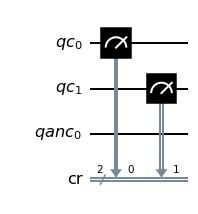

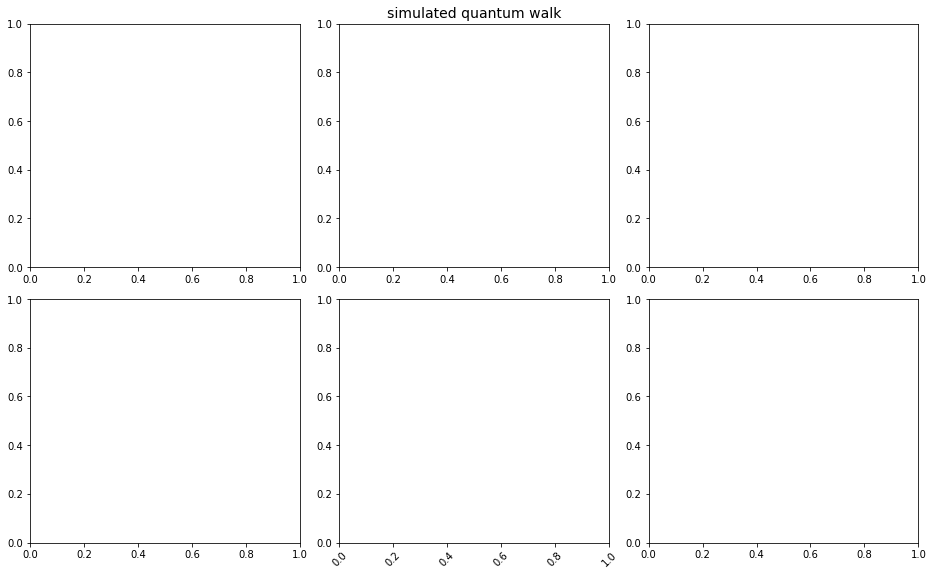

NameError: name 'simulatorType' is not defined

In [14]:
# run and plot 1D walk

steps = 19
n=2

for i in range(steps+1):
    #run classical random walk

    countsQuantum = run(i)
    propQuantum = counts_to_prob_1d(countsQuantum)
    
    names = []
    formatLabel = '{0:0'+str(n)+'b}'
    for idx in range(2**n):
        names.append('|' + formatLabel.format(idx) +'>')
    
    #plotting
    f, axs = plt.subplots(2,3,figsize=(13,8))
    margin=0.4
    f.subplots_adjust(margin, margin, 1.-margin, 1.-margin)



    axs[0,1].set_title('simulated quantum walk', fontsize=14)
    plt.sca(axs[0,1])
    
    #plotCircleGraph(names,propSim,color=[0.3,1,0])
    plt.sca(axs[1,1])
    #plt.bar(names,propSim,edgecolor='black', color=[0.3,1,0,.4], lw=2)
    plt.ylim(0,1) 
    plt.xticks(rotation=45)

      
    

    plt.tight_layout()
    plt.show()